# AI Applications in Global Warming

Compiled by Seyed Parsa Neshaei

## Table of Contents

- Foreword

- Introduction: What is global warming?

- How can AI be used regarding global warming?

- AI Application in-depth: Predicting CO2 Emission

- Conclusion

- Further reading and references

## Foreword

Global warming is a serious issue in the world, leading to noticable climate change. Many ice caps are being melted, sea levels are being risen and rainfalls are happening less, due to the rise of the temperature.

We, as a member of the society we're living in, have the responsibility to do whatever we can to reduce the risks by greenhouse gas emissions. In this notebook, we will get familiar with the problem of global warming, find out how can AI be used to tackle this issue and then we will see two applications of implementing AI on real-world datasets regarding global warming.

So, let's dive in!

## Introduction: What is global warming?

Global warming is an effect of the so-called greenhouse gases on the earth. These gases capture the sunlight, and as a result, an increase to the amount of these gases (including carbon dioxide and metane) in the atmosphere leads to a rise in the temperature of the surface of the earth.

Consequently, water level with rise due to ice being caps melted and also rainfalls happen less. This climate change can have devastating effects on the natural environment, because many species are sensitive to even small changes in the normal temperature of the atmosphere.

The increase in temperature also has several other consequences. For example, wildfires become more common, there would be more intense storms, droughts and acidic oceans, and all of this may cause human migration as a result. WHO has called this the greatest threat to global health in the 21st century.

## How can AI be used regarding global warming?

AI assists researchers in various fields, including the climate change and global warming. AI, data science, machine learning and deep learning are all useful in many fields, including the field of climate change, although the effect they have on climate change has not been explored as much as other fields were explored.

Some key places an ML model can assist researchers in this regard are:

- Modeling carbon sequestration
    - This is a method to predict how much C (carbon) will be removed from the air and stored. The climate models can’t exacyly predict the climate in a thousand years, due to it being very sensitive to small changes in the average temperature. ML algorithms are being used to model the impact of carbon sequestration on climate change.


- Predict carbon dioxide emissions
    - Here, ML algorithms are used to estimate how much CO2 can be emitted while still the climate remains within a given goal (i.e., staying under two degrees Celsius)
    
    
- Predicting greenhouse gas concentrations
    - Predict future concentrations of greenhouse gases



## AI Application in-depth 1: Predicting CO2 Emission

As an example, we want to predict CO2 emissions based on the previous data using an ML model. We will use a simple regression model to find trends in the data and predict CO2 emissions.

First, let's load the data (co2.csv) which was obtained and changed a bit to be clarified from [here](https://datahub.io/core/co2-ppm#readme):

In [16]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the data in co2.csv using pandas
df = pd.read_csv('co2.csv')

Then we can inspect the data:

In [17]:
df.head()

,Date,Decimal Date,Average
0,1958-03-01,1958.208,315.71
1,1958-04-01,1958.292,317.45
2,1958-05-01,1958.375,317.50
3,1958-06-01,1958.458,-99.99
4,1958-07-01,1958.542,315.86


This data shows the average CO2 emission in each date. Decimal Date is a column the creators of the dataset have added in order to make it easier for us to train a model.

Let's drop the Date column since we don't need it anymore:

In [18]:
# drop the Date column from df
df.drop("Date", axis=1, inplace=True)
df.head()

,Decimal Date,Average
0,1958.208,315.71
1,1958.292,317.45
2,1958.375,317.50
3,1958.458,-99.99
4,1958.542,315.86


We can see the shape of the data:

In [19]:
df.shape

(727, 2)

And we can plot the data:

<AxesSubplot:title={'center':'CO2 Emissions'}, xlabel='Decimal Date', ylabel='Average'>

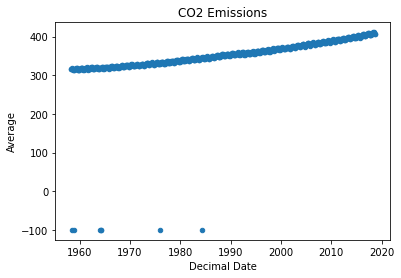

In [20]:
df.plot.scatter(x='Decimal Date', y='Average', title='CO2 Emissions')

We can see there are some negative numbers in the dataset. They seem to be errors, so we remove them:

<AxesSubplot:title={'center':'CO2 Emissions'}, xlabel='Decimal Date', ylabel='Average'>

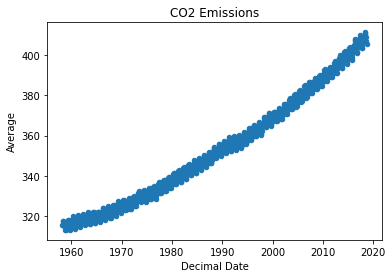

In [21]:
# remove any value less than 0 in the Average column of df
df = df[df['Average'] >= 0]
df.plot.scatter(x='Decimal Date', y='Average', title='CO2 Emissions')

Then, as you've previously seen while implementing scikit models, we start to prepare the data and make the model: (we do the reshape because LinearRegression expects a 2D input)

In [22]:
x = df['Decimal Date'].values.reshape(-1, 1)
y = df['Average'].values.reshape(-1, 1)

We choose 20 percent for testing:

In [23]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

And we finally fit the model:

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression()

And we evaluate the model on the test set:

In [26]:
preds = model.predict(Xtest)
preds_df = pd.DataFrame({'Predicted': preds.squeeze(), 'Read': ytest.squeeze()})
print(preds_df)

      Predicted    Read
0    400.230985  410.24
1    390.480879  393.12
2    383.590285  381.99
3    323.529636  324.42
4    399.319935  403.37
..          ...     ...
139  314.430057  321.39
140  345.889357  345.63
141  345.759876  346.03
142  367.729594  365.59
143  376.309686  373.79

[144 rows x 2 columns]


The result are similar to the real values, which means our model has been mostly successful.

The model can certainly be improved by using more advanced methods such as ANNs, but the goal here basically was to see how much a simple linear regression model may be useful in such a task.

## Conclusion

In this notebook, we learned about the problems regarding the climate change and how it can affect our lives, then studied some AI applications related to the global warming. We implemented a simple piece of code to show how simply we can perform an analysis of the available data on the internet to get insight about the environmental problems and predict metrics for the future, assuming the trends don't change in a noticable, significant manner.

## Further reading and references

- https://datahub.io/awesome/climate-change

- https://en.wikipedia.org/wiki/Climate_change

- https://vitalflux.com/machine-learning-use-cases-climate-change/

- https://data.world/datasets/global-warming

- https://www.analyticssteps.com/blogs/8-ways-which-ai-tackles-climate-change
